# Лабораторная работа №4

## Реализация приложения по распознаванию номеров домов

Набор изображений из _Google Street View_ с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9.

* 73257 изображений цифр в обучающей выборке;

* 26032 изображения цифр в тестовой выборке;

* 531131 изображения, которые можно использовать как дополнение к обучающей выборке;

* В двух форматах:

    * Оригинальные изображения с выделенными цифрами;

    * Изображения размером 32×32, содержащие одну цифру;

* Данные первого формата можно скачать по ссылкам:

    * http://ufldl.stanford.edu/housenumbers/train.tar.gz (обучающая выборка);

    * http://ufldl.stanford.edu/housenumbers/test.tar.gz (тестовая выборка);

    * http://ufldl.stanford.edu/housenumbers/extra.tar.gz (дополнительные данные);

* Данные второго формата можно скачать по ссылкам:

    * http://ufldl.stanford.edu/housenumbers/train_32x32.mat (обучающая выборка);

    * http://ufldl.stanford.edu/housenumbers/test_32x32.mat (тестовая выборка);

    * http://ufldl.stanford.edu/housenumbers/extra_32x32.mat (дополнительные данные);

* Описание данных на английском языке доступно по ссылке:

    * http://ufldl.stanford.edu/housenumbers/

### Задание 1

Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы _MNIST_ (http://yann.lecun.com/exdb/mnist/) или _notMNIST_).

Ознакомьтесь с имеющимися работами по данной тематике: англоязычная статья ( http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf ), видео на _YouTube_ (https://www.youtube.com/watch?v=vGPI_JvLoN0).

Используем архитектуру _LeNet-5_ и обучим сеть сначала на данных из набора _MNIST_.

In [1]:
! pip install tensorflow-gpu --pre --quiet

! pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: google-pasta, wrapt, wheel, protobuf, astunparse, h5py, gast, keras-preprocessing, six, grpcio, absl-py, opt-einsum, tensorboard, scipy, numpy, tensorflow-estimator, termcolor
Required-by: 


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np

In [0]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train, x_test = tf.keras.utils.normalize(x_train, axis = 1), tf.keras.utils.normalize(x_test, axis = 1)

In [0]:
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

In [7]:
from tensorflow.keras.utils import to_categorical

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

y_train.shape

(60000, 10)

In [0]:
IMAGE_DIM_0, IMAGE_DIM_1 = x_train.shape[1], x_train.shape[2]

In [0]:
CLASSES_N = y_train.shape[1]

In [10]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Conv2D, Dense, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'same',
                   input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(Flatten())
model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(CLASSES_N, activation = 'softmax'))

In [0]:
# 'sparse_categorical_crossentropy' gave NAN loss

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['categorical_accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
EPOCHS_N = 20

In [15]:
model.fit(x = x_train, y = y_train, validation_split = 0.15, epochs = EPOCHS_N)

Epoch 1/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2767 - categorical_accuracy: 0.9161 - val_loss: 0.1310 - val_categorical_accuracy: 0.9619
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1169 - categorical_accuracy: 0.9639 - val_loss: 0.0892 - val_categorical_accuracy: 0.9724
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0789 - categorical_accuracy: 0.9751 - val_loss: 0.0922 - val_categorical_accuracy: 0.9732
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0603 - categorical_accuracy: 0.9808 - val_loss: 0.0775 - val_categorical_accuracy: 0.9769
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0465 - categorical_accuracy: 0.9852 - val_loss: 0.0781 - val_categorical_accuracy: 0.9759
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0376 - categorical_accuracy: 0.9877 - val_loss: 0.0611 - val_categorical_accuracy:

In [16]:
results = model.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - categorical_accuracy: 0.9830
Test loss, test accuracy: [0.0756305530667305, 0.9829999804496765]


Удалось достичь отличного результата &mdash; точность распознавания на тестовой выборке составила 98,0%.

### Задание 2

После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор _Google Street View_). Что изменилось в модели?

In [0]:
DS_URL_FOLDER = 'http://ufldl.stanford.edu/housenumbers/'

FIRST_DS_EXT = '.tar.gz'
SECOND_DS_EXT = '_32x32.mat'

TRAIN_DS_NAME = 'train'
TEST_DS_NAME = 'test'
EXTRA_DS_NAME = 'extra'

In [0]:
from urllib.request import urlretrieve
import tarfile
import os

def load_file(_url_folder, _name, _ext, _key, _local_ext = ''):

    file_url_ = _url_folder + _name + _ext

    local_file_name_ = _name + '_' + _key + _local_ext

    urlretrieve(file_url_, local_file_name_)

    return local_file_name_

def tar_gz_to_dir(_url_folder, _name, _ext, _key):

    local_file_name_ = load_file(_url_folder, _name, _ext, _key, _ext)

    dir_name_ = _name + '_' + _key
    
    with tarfile.open(local_file_name_, 'r:gz') as tar_:
        tar_.extractall(dir_name_)

    os.remove(local_file_name_)

    return dir_name_

In [0]:
second_ds_train_file = load_file(DS_URL_FOLDER, TRAIN_DS_NAME, SECOND_DS_EXT, 'second')
second_ds_test_file = load_file(DS_URL_FOLDER, TEST_DS_NAME, SECOND_DS_EXT, 'second')
second_ds_extra_file = load_file(DS_URL_FOLDER, EXTRA_DS_NAME, SECOND_DS_EXT, 'second')

In [0]:
from scipy import io

second_ds_train = io.loadmat(second_ds_train_file)
second_ds_test = io.loadmat(second_ds_test_file)
second_ds_extra = io.loadmat(second_ds_extra_file)

In [21]:
X_second_ds_train = np.moveaxis(second_ds_train['X'], -1, 0)
X_second_ds_test = np.moveaxis(second_ds_test['X'], -1, 0)
X_second_ds_extra = np.moveaxis(second_ds_extra['X'], -1, 0)

y_second_ds_train = second_ds_train['y']
y_second_ds_test = second_ds_test['y']
y_second_ds_extra = second_ds_extra['y']

print(X_second_ds_train.shape, y_second_ds_train.shape)
print(X_second_ds_test.shape, y_second_ds_test.shape)
print(X_second_ds_extra.shape, y_second_ds_extra.shape)

(73257, 32, 32, 3) (73257, 1)
(26032, 32, 32, 3) (26032, 1)
(531131, 32, 32, 3) (531131, 1)


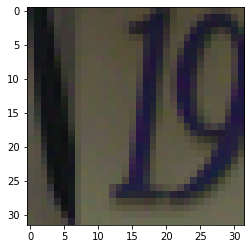

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X_second_ds_train[0])

plt.show()

In [0]:
IMAGE_DIM_0_2, IMAGE_DIM_1_2, IMAGE_DIM_2_2 = X_second_ds_train.shape[-3], X_second_ds_train.shape[-2], X_second_ds_train.shape[-1]

In [0]:
y_second_ds_train_cat = to_categorical(y_second_ds_train)
y_second_ds_test_cat = to_categorical(y_second_ds_test)

In [0]:
CLASSES_N_2 = y_second_ds_train_cat.shape[1]

In [0]:
model_2 = tf.keras.Sequential()

model_2.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'same',
                   input_shape = (IMAGE_DIM_0_2, IMAGE_DIM_1_2, IMAGE_DIM_2_2)))
model_2.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model_2.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'))
model_2.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model_2.add(Flatten())
model_2.add(Dense(120, activation = 'tanh'))
model_2.add(Dense(84, activation = 'tanh'))
model_2.add(Dense(CLASSES_N_2, activation = 'softmax'))

In [0]:
model_2.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['categorical_accuracy'])

In [28]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [29]:
model_2.fit(x = X_second_ds_train, y = y_second_ds_train_cat, validation_split = 0.15, epochs = EPOCHS_N)

Epoch 1/20
1946/1946 [==============================] - 6s 3ms/step - loss: 1.0282 - categorical_accuracy: 0.6717 - val_loss: 0.7178 - val_categorical_accuracy: 0.7772
Epoch 2/20
1946/1946 [==============================] - 6s 3ms/step - loss: 0.6711 - categorical_accuracy: 0.7900 - val_loss: 0.6110 - val_categorical_accuracy: 0.8098
Epoch 3/20
1946/1946 [==============================] - 6s 3ms/step - loss: 0.5652 - categorical_accuracy: 0.8228 - val_loss: 0.6023 - val_categorical_accuracy: 0.8105
Epoch 4/20
1946/1946 [==============================] - 6s 3ms/step - loss: 0.5118 - categorical_accuracy: 0.8394 - val_loss: 0.6266 - val_categorical_accuracy: 0.8065
Epoch 5/20
1946/1946 [==============================] - 6s 3ms/step - loss: 0.4731 - categorical_accuracy: 0.8516 - val_loss: 0.5390 - val_categorical_accuracy: 0.8373
Epoch 6/20
1946/1946 [==============================] - 6s 3ms/step - loss: 0.4438 - categorical_accuracy: 0.8621 - val_loss: 0.4970 - val_categorical_accuracy:

In [30]:
results = model_2.evaluate(X_second_ds_test, y_second_ds_test_cat)

print('Test loss, test accuracy:', results)

814/814 [==============================] - 2s 2ms/step - loss: 0.5624 - categorical_accuracy: 0.8352
Test loss, test accuracy: [0.5623723268508911, 0.8352412581443787]


Прежде всего, в модели изменилось то, что добавился ещё один класс &mdash; _не распознано_.

Эти данные более сложны для распознавания, что повлияло на результат &mdash; точность распознавания на тестовой выборке составила 77,4%.

Теперь реализуем распознавание первого датасета &mdash; реальных изображений с несколькими цифрами и границами. Для этого потребуется реализация алгоритма _YOLO_.

In [0]:
from imageio import imread
import pandas as pd

def image_to_array(_image):  
    try:
        array_ = imread(_image)

        return True, array_
    except:
        return False, None

def dir_to_dataframe(_dir_path):

    data_ = []

    files_ = sorted(os.listdir(_dir_path))

    for f in files_:
        file_path_ = os.path.join(_dir_path, f)
        
        can_read_, im = image_to_array(file_path_)

        if can_read_:
            data_.append(im)

    dataframe_ = pd.DataFrame()

    dataframe_['data'] = np.array(data_)

    return dataframe_

In [0]:
first_ds_train_dir = tar_gz_to_dir(DS_URL_FOLDER, TRAIN_DS_NAME, FIRST_DS_EXT, 'first')
first_ds_test_dir = tar_gz_to_dir(DS_URL_FOLDER, TEST_DS_NAME, FIRST_DS_EXT, 'first')

In [0]:
first_ds_train_subdir = os.path.join(first_ds_train_dir, 'train')
first_ds_test_subdir = os.path.join(first_ds_test_dir, 'test')

In [0]:
first_ds_train_images_df = dir_to_dataframe(first_ds_train_subdir)
first_ds_test_images_df = dir_to_dataframe(first_ds_test_subdir)

In [0]:
import h5py

first_ds_train_boxes_mat = h5py.File(os.path.join(first_ds_train_subdir, 'digitStruct.mat'), 'r')
first_ds_test_boxes_mat = h5py.File(os.path.join(first_ds_test_subdir, 'digitStruct.mat'), 'r')

In [0]:
import numpy as np
import pickle
import h5py

def mat_to_pickle(_mat_path, _key):

    f = h5py.File(_mat_path, 'r')

    metadata = {}

    metadata['height'] = []
    metadata['label'] = []
    metadata['left'] = []
    metadata['top'] = []
    metadata['width'] = []

    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(int(obj[0][0]))
        else:
            for k in range(obj.shape[0]):
                vals.append(int(f[obj[k][0]][0][0]))
        metadata[name].append(vals)

    for item in f['/digitStruct/bbox']:
        f[item[0]].visititems(print_attrs)

    with open('{}.pickle'.format((_key)),'wb') as pf:
        pickle.dump(metadata, pf, pickle.HIGHEST_PROTOCOL)

In [0]:
mat_to_pickle(os.path.join(first_ds_train_subdir, 'digitStruct.mat'), 'train_bbox')
mat_to_pickle(os.path.join(first_ds_test_subdir, 'digitStruct.mat'), 'test_bbox')

In [0]:
train_bbox_data = np.load('train_bbox.pickle', allow_pickle = True)
test_bbox_data = np.load('test_bbox.pickle', allow_pickle = True)

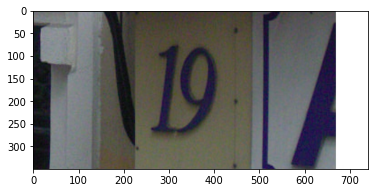

In [39]:
plt.imshow(first_ds_train_images_df['data'][0])

plt.show()

In [40]:
train_bbox_data['label'][0]

[1, 9]

### Задание 3

Сделайте множество снимков изображений номеров домов с помощью смартфона на ОС _Android_. Также можно использовать библиотеки _OpenCV_, _Simple CV_ или _Pygame_ для обработки изображений с общедоступных камер видеонаблюдения (например, https://www.earthcam.com/).

В качестве примера использования библиотеки _TensorFlow_ на смартфоне можете воспользоваться демонстрационным приложением от _Google_ (https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android).

### Задание 4

Реализуйте приложение для ОС _Android_, которое может распознавать цифры в номерах домов, используя разработанный ранее классификатор. Какова доля правильных классификаций?